In [0]:
#KILL SWITCH: DO NOT RUN THIS LINE IF RUNNING ENTIRE GOOGLE COLAB NOTEBOOK
!kill -9 -1

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloadedTest = drive.CreateFile({'id':'1rGfRRaEqKAT0EwyF8uZRTDbfVBDajiE_'}) # replace the id with id of file you want to access
downloadedTest.GetContentFile('test.csv')  

downloadedTrain = drive.CreateFile({'id':'14rKrVfwK_Q0YeDnCknCF9N5Gz-m5502U'}) # replace the id with id of file you want to access
downloadedTrain.GetContentFile('train.csv')

downloadedValidation = drive.CreateFile({'id':'16kjxp9JOgUVExDHlcTGGS4eGjoYP6m0N'}) # replace the id with id of file you want to access
downloadedValidation.GetContentFile('validation.csv')

In [2]:
ls

datalab/  test.csv  train.csv  validation.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.plotly as py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [0]:
#Read file as panda dataframe
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
validation = pd.read_csv('validation.csv')

In [5]:
print(train.shape)
print(list(train.columns))

(2430981, 25)
['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag']


In [6]:
#Cell to test different columns for number of unique values:
train['usertag'].unique().shape
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [0]:
#SPLIT OS AND BROWSER:

train['OS'] = train['useragent'].apply( lambda x: x.split('_')[0] )
train['browser'] = train['useragent'].apply( lambda x: x.split('_')[1] )

validation['OS'] = validation['useragent'].apply( lambda x: x.split('_')[0] )
validation['browser'] = validation['useragent'].apply( lambda x: x.split('_')[1] )



In [0]:
#DROP COLUMNS THAT HAD TOO MANY UNIQUE VALUES AND USER AGENT
train =           train.drop(['useragent','bidid', 'userid','IP','url','urlid','slotid','domain','city','creative','bidprice','payprice'], axis=1)
validation = validation.drop(['useragent','bidid', 'userid','IP','url','urlid','slotid','domain','city','creative','bidprice','payprice'], axis=1)


In [9]:
print(validation.shape)
print(train.shape)
print(list(train.columns))

(303925, 15)
(2430981, 15)
['click', 'weekday', 'hour', 'region', 'adexchange', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'keypage', 'advertiser', 'usertag', 'OS', 'browser']


In [13]:
#Count of clicks Vs. non-clicks
train['click'].value_counts()

0    2429188
1       1793
Name: click, dtype: int64

In [0]:
#Use a negative downsampling rate of 2.5% as suggested by the #Predicting Facebook Clicks
train_majority = train[train.click==0]
train_minority = train[train.click==1]

#Downsample Majority Class
train_majority_downsampled = resample(train_majority,
                                     replace=False,
                                     n_samples=60730,
                                     random_state=123) #Random State for Reproducibility

#Combine Downsampled majority with minority
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
train_downsampled.click.value_counts()
train_downsampled = shuffle(train_downsampled,random_state=123) #Random State for Reproducibility

In [0]:
#Hot encode TRAIN and obtain individual values for usertag
train_downsampled['usertag'] = train_downsampled['usertag'].str.split(',')
train_downsampled_usertags = train_downsampled['usertag'].str.join('@').str.get_dummies('@').add_prefix('usertag_')
train_downsampled = pd.concat([train_downsampled, train_downsampled_usertags], axis=1)
train_downsampled = train_downsampled.drop(['usertag'], axis=1)

In [0]:
#Hot encode VALIDATION and obtain individual values for usertag
validation['usertag'] = validation['usertag'].str.split(',')
validation_usertags = validation['usertag'].str.join('@').str.get_dummies('@').add_prefix('usertag_')
validation = pd.concat([validation, validation_usertags], axis=1)
validation = validation.drop(['usertag'], axis=1)

In [0]:
#HOT ENCODE TRAIN
cat_vars=['weekday','hour','OS','browser','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','region','keypage']
for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list = pd.get_dummies(train_downsampled[var], prefix=var)
  train_downsampled1=train_downsampled.join(cat_list)
  train_downsampled=train_downsampled1
  
#Hot Encode!
cat_vars=['weekday','hour','OS','browser','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','region','keypage']
data_vars=train_downsampled.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

hotETrain=train_downsampled[to_keep]


In [18]:
print(list(hotETrain.columns))

['click', 'slotprice', 'usertag_10006', 'usertag_10024', 'usertag_10031', 'usertag_10048', 'usertag_10052', 'usertag_10057', 'usertag_10059', 'usertag_10063', 'usertag_10067', 'usertag_10074', 'usertag_10075', 'usertag_10076', 'usertag_10077', 'usertag_10079', 'usertag_10083', 'usertag_10093', 'usertag_10102', 'usertag_10110', 'usertag_10111', 'usertag_10114', 'usertag_10115', 'usertag_10116', 'usertag_10117', 'usertag_10118', 'usertag_10120', 'usertag_10123', 'usertag_10125', 'usertag_10126', 'usertag_10127', 'usertag_10129', 'usertag_10130', 'usertag_10131', 'usertag_10133', 'usertag_10138', 'usertag_10140', 'usertag_10142', 'usertag_10145', 'usertag_10146', 'usertag_10147', 'usertag_10148', 'usertag_10149', 'usertag_10684', 'usertag_11092', 'usertag_11278', 'usertag_11379', 'usertag_11423', 'usertag_11512', 'usertag_11576', 'usertag_11632', 'usertag_11680', 'usertag_11724', 'usertag_11944', 'usertag_13042', 'usertag_13403', 'usertag_13496', 'usertag_13678', 'usertag_13776', 'usertag

In [0]:
#HOT ENCODE VALIDATION
cat_vars=['weekday','hour','OS','browser','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','region','keypage']
for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list = pd.get_dummies(validation[var], prefix=var)
  validation1=validation.join(cat_list)
  validation=validation1
  
  #@title Default title text
#Hot Encode!
cat_vars=['weekday','hour','OS','browser','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','region','keypage']
data_vars=validation.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

hotEValidation=validation[to_keep]

In [0]:
temp = pd.get_dummies(pd.concat([hotETrain,hotEValidation],keys=[0,1]))
hotETrain,hotEValidation = temp.xs(0),temp.xs(1)


In [0]:
data_hotEncodedTrain = hotETrain.fillna(0)
data_hotEncodedValidation = hotEValidation.fillna(0)

In [22]:
print(data_hotEncodedTrain.shape)
print(data_hotEncodedValidation.shape)

(62523, 232)
(303925, 232)


In [0]:
cols = list(data_hotEncodedTrain)
cols.insert(0,cols.pop(cols.index('click')))
data_hotEncodedTrain = data_hotEncodedTrain.loc[:,cols]

cols2 = list(data_hotEncodedValidation)
cols2.insert(0,cols2.pop(cols2.index('click')))
data_hotEncodedValidation = data_hotEncodedValidation.loc[:,cols2]

In [0]:
data_final_vars=data_hotEncodedTrain.columns.values.tolist()
y=['click']
X=[i for i in data_final_vars if i not in y]

In [0]:
XTrain = data_hotEncodedTrain[X]
yTrain = data_hotEncodedTrain['click']
XValidation = data_hotEncodedValidation[X]
yValidation = data_hotEncodedValidation['click']

In [0]:
#FEATURE SELECTION
#rfe = RFE(logreg, 40)
#rfe = rfe.fit(data_hotEncodedTrain[X], data_hotEncodedTrain[y].values.ravel())

In [0]:
#featureSelectionArray = []
#Which columns to keep
#i=1
#for value in rfe.support_:
#  if value ==1:
#    featureSelectionArray.append(i)
#  else:
#    pass
#  i=i+1
#print(featureSelectionArray)

In [0]:
#KEEP FEATURE SELECTION
#FinalTrain =           data_hotEncodedTrain.iloc[:,featureSelectionArray] 
#FinalValidation = data_hotEncodedValidation.iloc[:,featureSelectionArray]
#FinalValidation.shape

In [0]:
XTrain = data_hotEncodedTrain[X]
yTrain = data_hotEncodedTrain['click']

XValidation = data_hotEncodedValidation[X]
yValidation = data_hotEncodedValidation['click']

In [30]:
X_train=XTrain
y_train=yTrain
X_test = XValidation
y_test = yValidation
print(y_test.shape)
print(X_test.shape)

(303925,)
(303925, 231)


In [0]:
#HYPER PARAMETER TUNE
CValue = [0.001,0.0005,0.0001.0.01,0.5,0.1,0.5]
maxIterations = [50,100,150,200,250,300] 

In [0]:
def hyperparameterTuneLogistic(i,j,X_train,y_train,X_test,y_test):
  
  print("        C =" + str(i) + "          Maximum Iterations =" + str(j))
  logreg = LogisticRegression(C=i,max_iter=j,class_weight='balanced',random_state=123)
  logreg.fit(X_train, y_train)
  
  y_pred = logreg.predict(X_test)
  
  kfold = model_selection.KFold(n_splits=10)
  modelCV = LogisticRegression()
  scoring = 'accuracy'
  results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
  print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
  
  confusion_matrix2 = confusion_matrix(y_test, y_pred)
  print(confusion_matrix2)
  
  
  print(classification_report(y_test, y_pred))

  
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  return

In [0]:
for i in CValue:
    hyperparameterTuneLogistic(i,100,X_train, y_train, X_test, y_test)

        C =0.001          Maximum Iterations =100
10-fold cross validation average accuracy: 0.974
[[254230  49493]
 [    63    139]]
             precision    recall  f1-score   support

          0       1.00      0.84      0.91    303723
          1       0.00      0.69      0.01       202

avg / total       1.00      0.84      0.91    303925



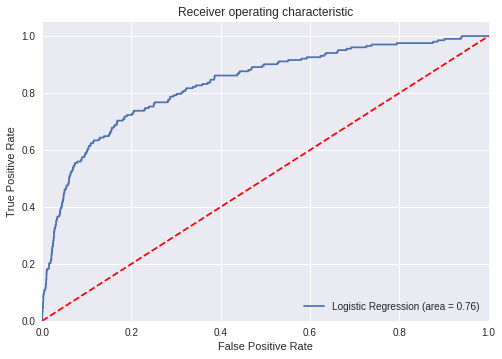

In [45]:
#BEST RESULT:

#C =0.001  Maximum Iterations = (MAKES NO DIFFERENCE:100 Optimal Values)
#[[254230  49493]
 #[    63    139]]
hyperparameterTuneLogistic(0.001,100,X_train, y_train, X_test, y_test)

In [0]:
#Export Predicted Probabilities to CSV FOR USE IN BIDDING STRATEGY IN ANOTHER NOTEBOOK:

logreg = XGBClassifier(max_depth=5,learning_rate=0.1, n_estimators=100,random_state=123)
logreg.fit(X_train, y_train)

y_pred = logreg.predict_proba(X_test)
#predictions = [round(value) for value in y_pred]

In [0]:
y_pred1 = y_pred[:,[1]]

In [0]:
y_pred1 = y_pred[:,[1]]

In [0]:
#Code to import for bidding strategies
pCTR = pd.DataFrame(y_pred1).to_csv('pCTR.csv')


In [0]:
#code to import for bidding strategies
from google.colab import files

files.download('pCTR.csv')